In [1]:
from scipy.optimize import linprog

# 目标函数系数（假设我们要最小化这个目标函数）
c = [-1, -2]  # 例如，最小化 -x - 2y

# 不等式约束矩阵 (Ax <= b)
A = [[2, 1], [1, 1], [1, 0]]
b = [20, 16, 4]  # 2x + y <= 20, x + y <= 16, x <= 4

# 调用linprog
res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))#bounds=(0, None)表示x,y>=0,A_ub表示不等式约束矩阵，b_ub表示不等式约束矩阵的值

# 输出结果
print('最优值:', res.fun)
print('最优解:', res.x)


最优值: -32.0
最优解: [ 0. 16.]


假设有三种投资选项，每种投资的预期收益率和风险如下：

投资1：收益率10%，风险级别5
投资2：收益率15%，风险级别8
投资3：收益率20%，风险级别11
假设投资者愿意承担的最大风险级别是a。我们希望最大化投资组合的总收益，同时不超过这个风险级别。

这个问题可以用以下线性规划模型来描述：

目标函数：最大化总收益 = 0.1x1 + 0.15x2 + 0.2x3
约束条件：x1 + x2 + x3 = 1 （投资总和为100%）
风险约束：5x1 + 8x2 + 11x3 <= a
非负约束：x1, x2, x3 >= 0

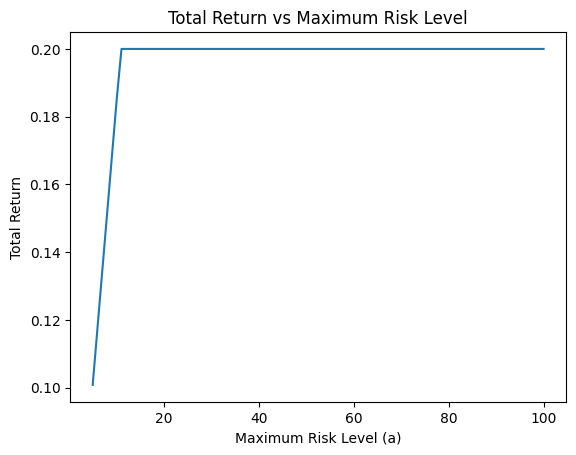

In [20]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

# 目标函数系数（负值，因为linprog默认求解最小化问题）
c = [-0.1, -0.15, -0.2]

# 等式约束：投资比例之和为1
A_eq = [[1, 1, 1]]
b_eq = [1]

# 定义a的范围
a_values = np.linspace(0, 100, 100)  # 例如，风险承受能力从0到100
total_returns = []  # 用于存储每个a值对应的最优收益

# 对每个a值求解线性规划
for a in a_values:
    A_ub = [[5, 8, 11]]
    b_ub = [a]
    res = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=[(0, None), (0, None), (0, None)])
    
    if res.success:
        total_returns.append(-res.fun)  # 取反以得到最大化收益
    else:
        total_returns.append(None)  # 如果问题无解，则添加None

# 绘制a与总收益的关系图
plt.plot(a_values, total_returns)
plt.xlabel('Maximum Risk Level (a)')
plt.ylabel('Total Return')
plt.title('Total Return vs Maximum Risk Level')
plt.show()
#这里可以看出，当风险承受能力为0时，最大收益为0，当风险承受能力为20时，最大收益为2.5，当风险承受能力为40时，最大收益为5，当风险承受能力为60时，最大收益为7.5，当风险承受能力为80时，最大收益为10，当风险承受能力为100时，最大收益为12.5
